<a href="https://colab.research.google.com/github/Gnaneswar09/Customer-Conversion-Prediction/blob/main/proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


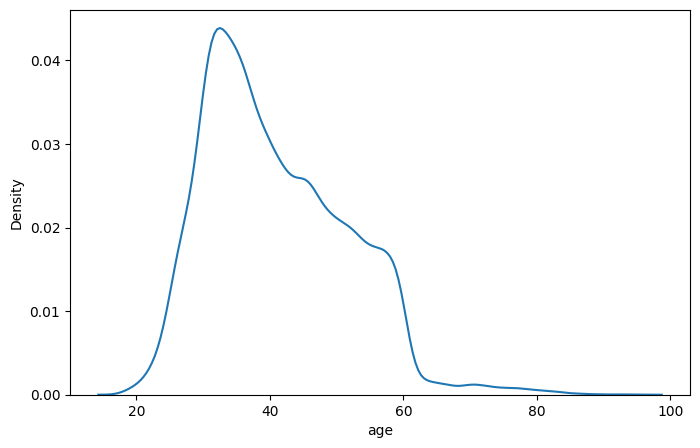

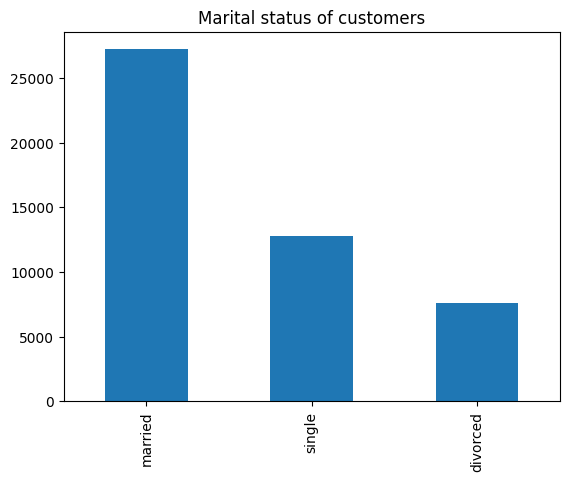

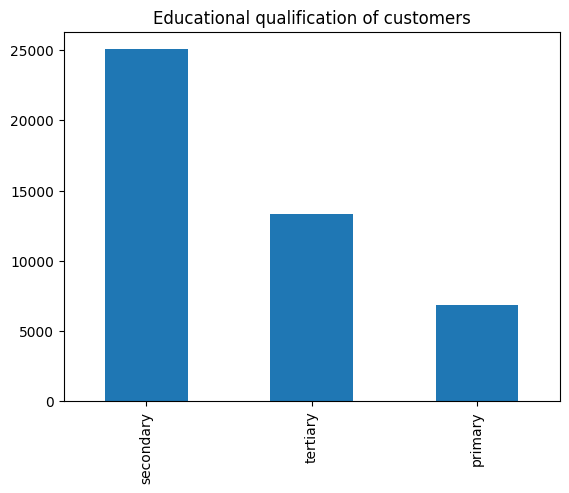

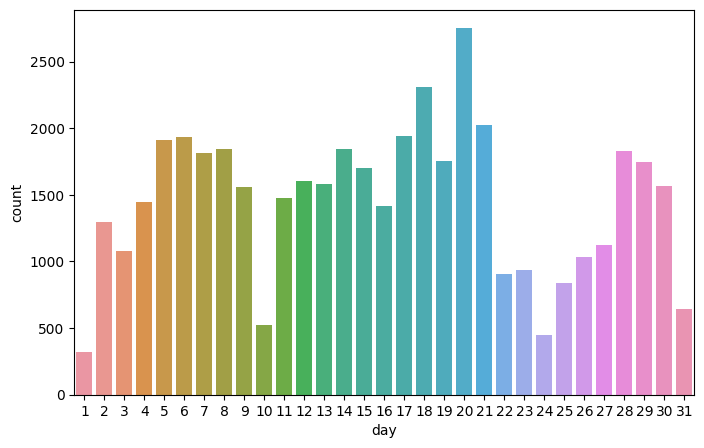

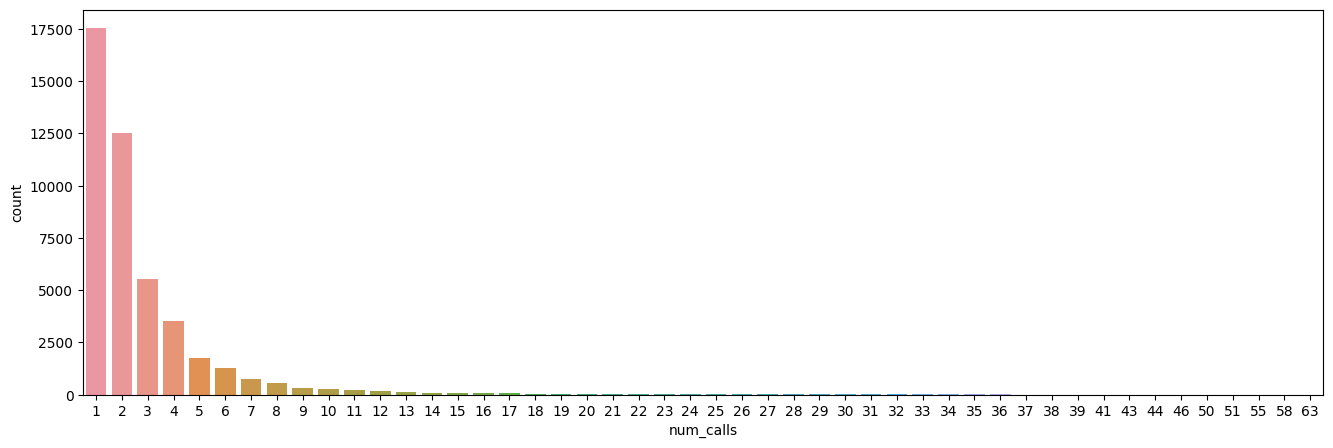

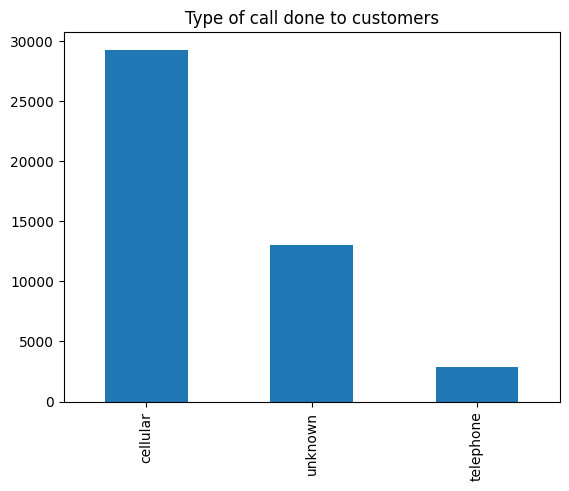

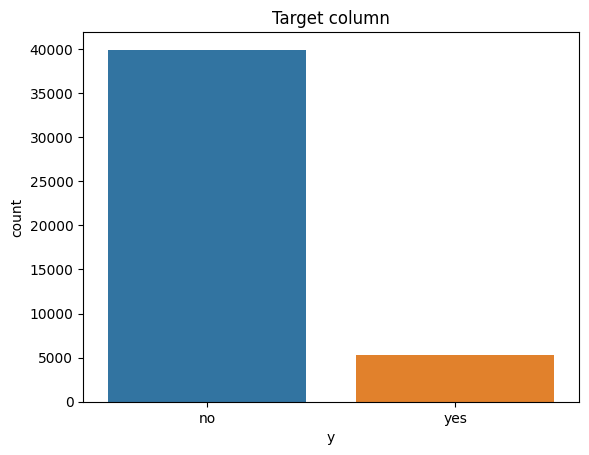

ValueError: ignored

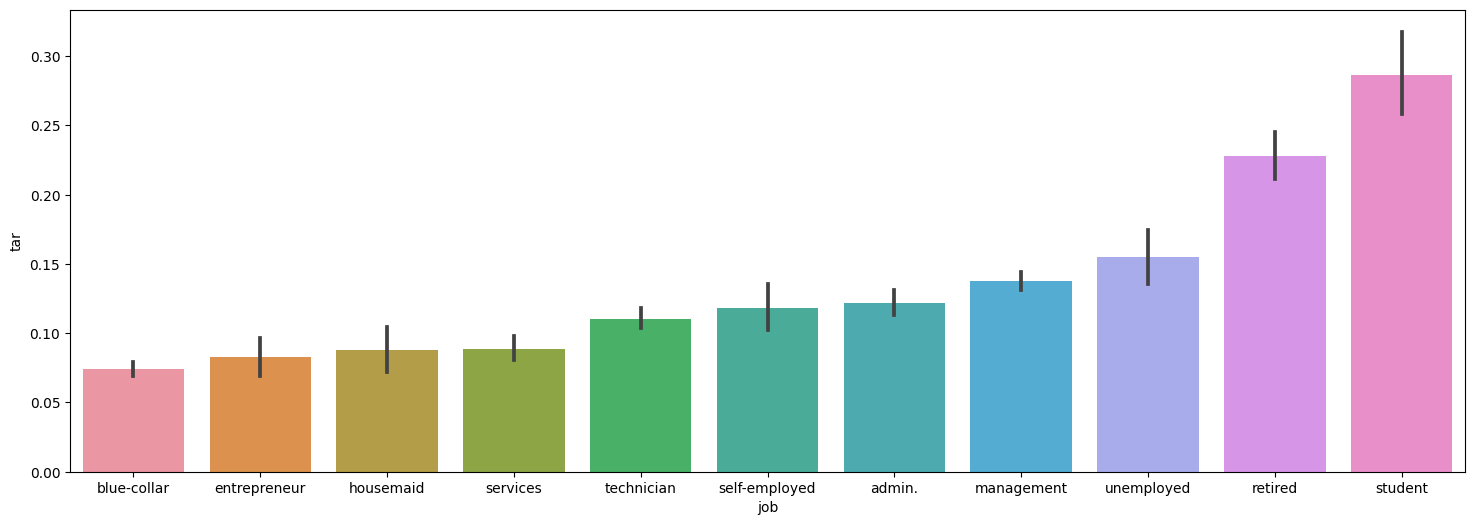

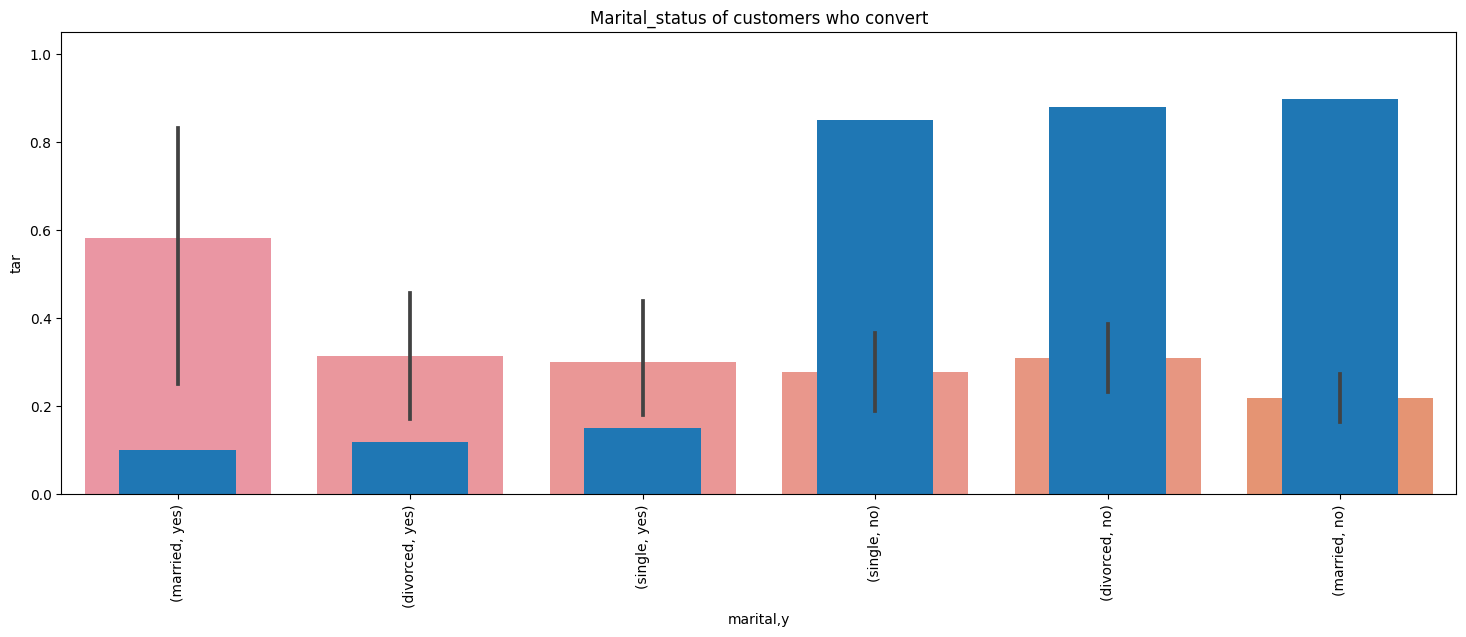

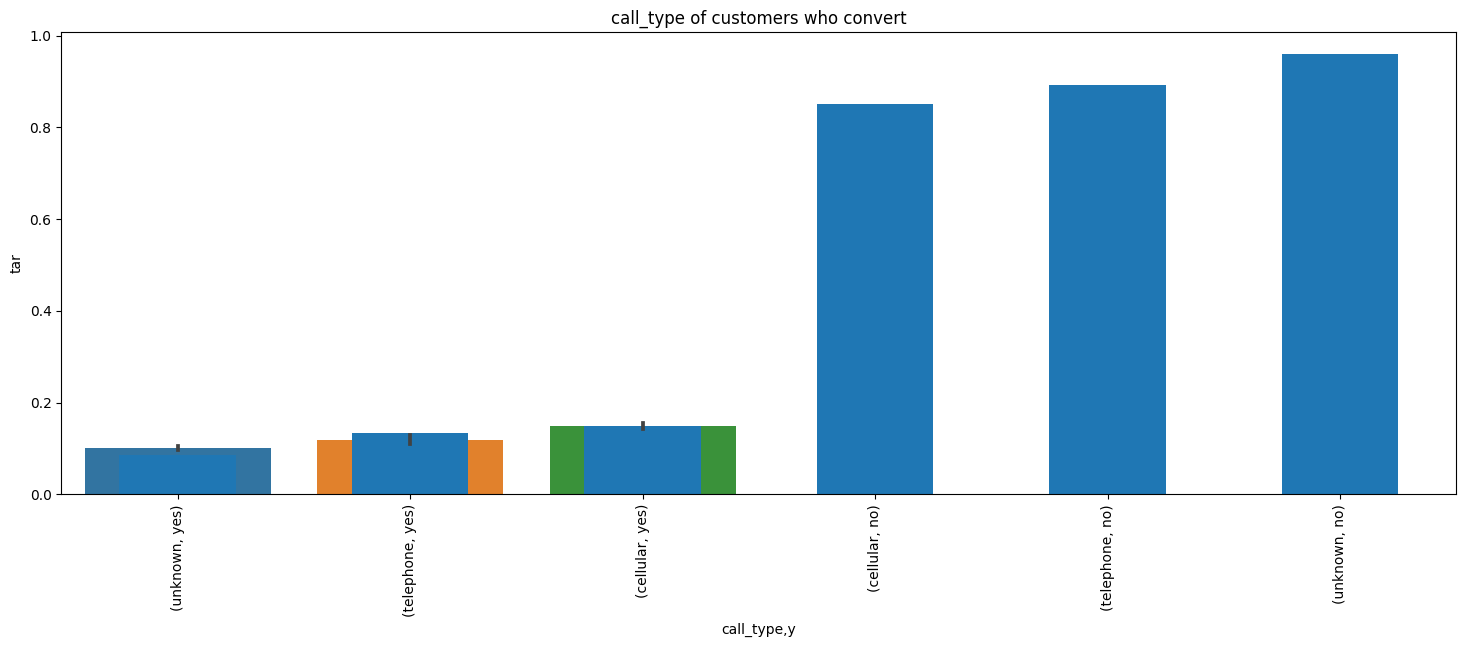

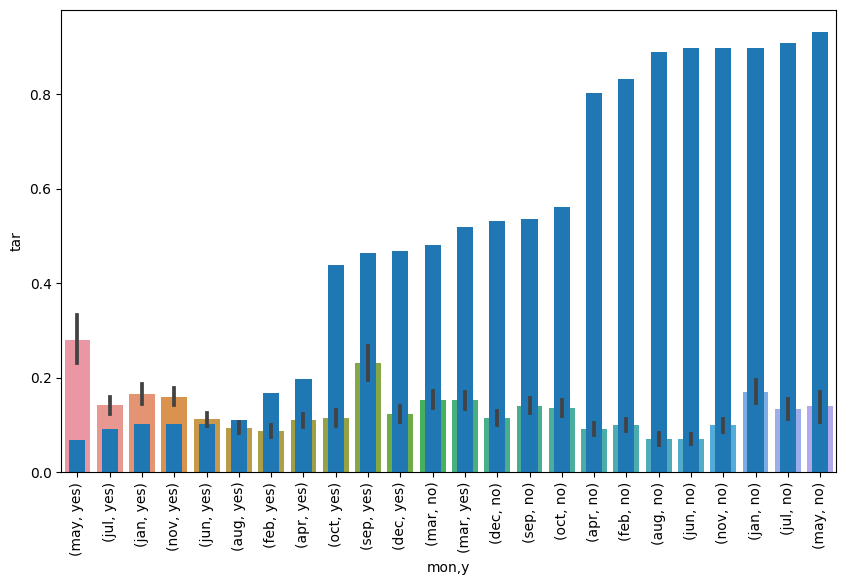

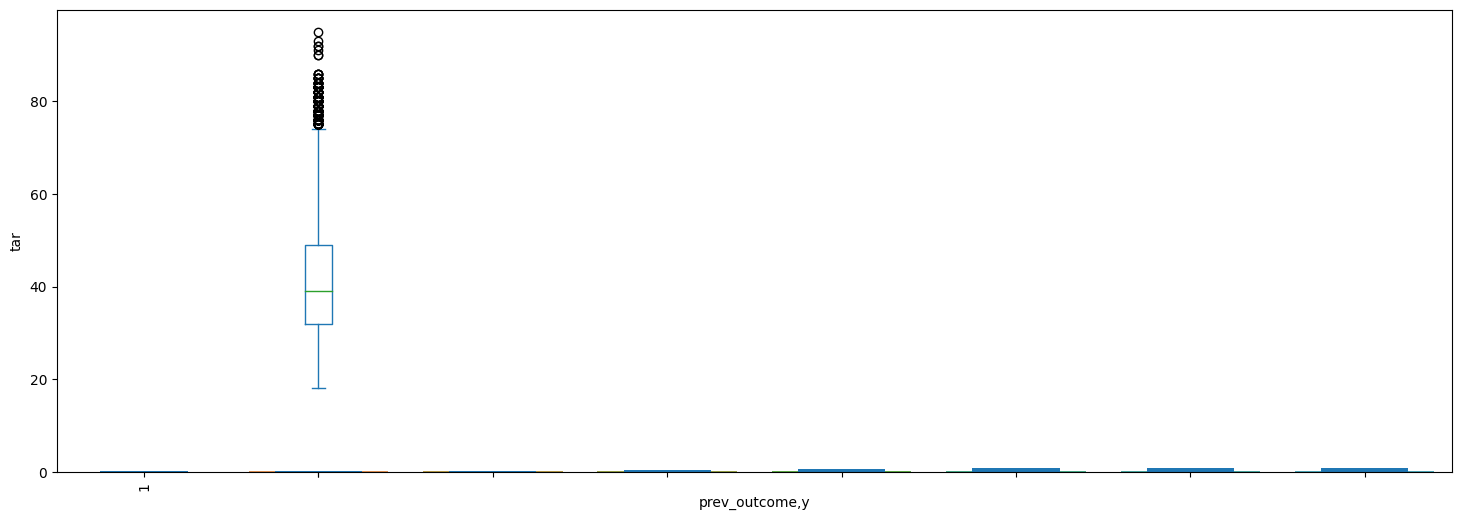

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df=pd.read_csv("/content/train.csv")
df.head()

df.info()

df.isnull().sum()

df.shape

df.describe()

df.drop_duplicates()

df.age.unique()

df.job.unique()

df.marital.unique()

df.education_qual.unique()

df.call_type.unique()

df.day.unique()

df.mon.unique()

df.dur.unique()

df.num_calls.unique()

df.prev_outcome.unique()

df.y.unique()

df["y"]

"""**Visualising the data**"""



plt.figure(figsize=(8,5))
sns.kdeplot(data=df,x="age")
plt.show()

df.job.value_counts()

df.job= df.job.str.replace("unknown","blue-collar")
# df.isnull().sum()

df["job"].value_counts().plot(kind="bar")
plt.title("No of customers with various jobs")

df["marital"].value_counts().plot(kind="bar")
plt.title("Marital status of customers")
plt.show()

df.education_qual.value_counts()

df.education_qual = df.education_qual.str.replace("unknown","secondary")

df["education_qual"].value_counts().plot(kind="bar")
plt.title("Educational qualification of customers")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df,x="day")
plt.show()

plt.figure(figsize=(16,5))
sns.countplot(data=df,x="num_calls")
plt.show()

df.call_type.value_counts()

df["call_type"].value_counts().plot(kind="bar")
plt.title("Type of call done to customers")
plt.show()

df["y"].value_counts()

sns.countplot(x="y",data=df)
plt.title("Target column")
plt.show()



df["tar"]=df.y
df.tar

df["tar"]=df.tar.map({"yes":1,"no":0})
job_conversion = df.groupby("job")["tar"].mean()
sorted = job_conversion.reset_index().sort_values("tar")["job"]

plt.figure(figsize=(18,6))
sns.barplot(x="job",y="tar",data = df,order=sorted)

#plt.title("Jobs Which, Show Conversion")

"""Student,retired,management,admin seem to convert most"""

age=df.groupby("age")["tar"].mean()
sorted = age.reset_index().sort_values('age')['age']
plt.figure(figsize=(18,6))
sns.barplot(x="age",y="tar",data=df,order=sorted)

viz1=df.groupby("marital")["y"].value_counts(normalize=True).sort_values(ascending=True).plot(kind="bar")
plt.title("Marital_status of customers who convert")

"""Singles show higher rate of conversion"""

marital = df.groupby("marital")["tar"].mean()
sorted = marital.reset_index().sort_values("tar")["marital"]
plt.figure(figsize=(18,6))
sns.barplot(x="marital",y="tar",data = df,order=sorted)

viz2=df.groupby("education_qual")["y"].value_counts(normalize=True).sort_values(ascending=True).plot(kind="bar")
plt.title("Educational Qualification of customers who convert")

"""Tertiary Qualification customers tend to convert most"""

viz2=df.groupby("call_type")["y"].value_counts(normalize=True).sort_values(ascending=True).plot(kind="bar")
plt.title("call_type of customers who convert")

day = df.groupby("day")["tar"].mean()
sorted = day.reset_index().sort_values("day")["day"]
plt.figure(figsize=(18,6))
sns.barplot(x="day",y="tar",data = df,order=sorted)

"""1,10,30 is the best day to call the customer"""

viz3=df.groupby("mon")["y"].value_counts(normalize =True).sort_values(ascending=True).plot(kind="bar",figsize=(10,6))

mon = df.groupby("mon")["tar"].mean()
sorted = mon.reset_index().sort_values("tar")["mon"]
plt.figure(figsize=(18,6))
sns.barplot(x="mon",y="tar",data = df,order=sorted)

"""I have used two plots to visualize whether our conversion rate is correct . March has highest conversion rate follwed by december,september,october"""

viz4=df.groupby("prev_outcome")["y"].value_counts(normalize=True).sort_values(ascending=True).plot(kind="bar")

"""customers who previously said yes are tend to convert more"""



df["job"]=df.job.map({'student':11,'retired':10,'unemployed':9,'management':8,'admin.':7,'self-employed':6,'technician':5,'services':4,'housemaid':3,'entrepreneur':2,'blue-collar':1})
df["marital"]=df.marital.map({'married':1,'single':3,'divorced':2})
df["education_qual"]=df.education_qual.map({'tertiary':3,'secondary':2,'primary':1})
df["call_type"]=df.call_type.map({'unknown':1,'cellular':3,'telephone':2,})
df["mon"]=df.mon.map({"jan":3,"feb":7,"mar":12,"apr":8,"may":1,"jun":5,"jul":2,"aug":6,"sep":10,"oct":9,"nov":4,"dec":11})
df["prev_outcome"]=df.prev_outcome.map({"unknown":1,"failure":2,"other":3,"success":4})
df["y"]=df.y.map({"yes":1,"no":0})
df["y"]

#Encoded Data
df

df.drop(["tar"],axis=1)

#split the data

X = df.drop(["y","tar"],axis=1)
Y = df["y"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

X

from sklearn.tree import DecisionTreeClassifier
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred
importance=model.feature_importances_
list(zip(importance,X_test.columns))

"""Balancing the Dataset for Accurate results"""

from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy=0.5)
X_smt, Y_smt = smt.fit_resample(X_train, Y_train)

X_smt.shape

Y_smt.shape



X_smt.iloc[:,0].plot(kind='box') #checking for outlier in age column

iqr = X_smt[X_smt.columns[0]].quantile(0.75) - X_smt[X_smt.columns[0]].quantile(0.25)
upper_threshold = X_smt[X_smt.columns[0]].quantile(0.75) + (1.5 * iqr)
lower_threshold = X_smt[X_smt.columns[0]].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

X_smt[X_smt.columns[0]].clip(lower_threshold, upper_threshold, inplace=True)
#outliers are in upper region so there is outlier in maximum age which need to be treated. clipping is done at lower and upper thresholds

X_smt[X_smt.columns[0]].max()

#checking for outlier in Duration column
X_smt.iloc[:,7].plot(kind="box")

iqr = X_smt[X_smt.columns[7]].quantile(0.75) - X_smt[X_smt.columns[7]].quantile(0.25)
upper_threshold = X_smt[X_smt.columns[7]].quantile(0.75) + (1.5 * iqr)
lower_threshold = X_smt[X_smt.columns[7]].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

X_smt[X_smt.columns[7]].clip(lower_threshold,upper_threshold,inplace=True)
X_smt[X_smt.columns[7]].max()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smt)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
log_reg= LogisticRegression(solver = "lbfgs",class_weight="balanced")
log_reg.fit(X_scaled,Y_smt)
y_pred = log_reg.predict(X_test_scaled)
f1_score = f1_score(y_pred,Y_test)*100
f1_score

X_smt

X_test

#KNN (K-Nearest Neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
k_range = range(11,25)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, Y_smt)
    train_score = accuracy_score(Y_smt, knn.predict(X_scaled))
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    val_score = np.mean(cross_val_score(knn, X_scaled, Y_smt, cv=cv, scoring='f1'))
    print("k_value  : ", k," Training Accuracy : ", train_score, " Cross val score : " ,np.mean(val_score))

from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_scaled, Y_smt)
y_pred = knn.predict(X_test_scaled)
score = f1_score(y_pred,Y_test)*100
score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
for depth in range(1,11):
   dt = DecisionTreeClassifier(max_depth=depth)
   dt.fit(X_smt, Y_smt)
   train_score = accuracy_score(Y_smt, dt.predict(X_smt))
   valAccuracy = cross_val_score(dt, X_smt, Y_smt, cv=10,scoring='f1')
   print("Depth  : ", depth," Training Accuracy : ", train_score, " Cross val score : " ,np.mean(valAccuracy))

from sklearn.metrics import f1_score
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_smt, Y_smt)
y=dt.predict(X_test)
f = f1_score(y,Y_test)*100
f

#After balancing Data Decision tree gives score of 88.71%, Well using Bagging approach for better results

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
classifier=RandomForestClassifier(n_estimators= 100, max_depth = 9, max_features='log2',random_state=42)
classifier.fit(X_smt,Y_smt)
Y_pred = classifier.predict(X_test)
Y_pred
#Evaluation
f1_score(Y_pred,Y_test)*100

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth = 6, random_state=42), n_estimators=100)
model.fit(X_smt, Y_smt)
y = model.predict(X_test)
f1_score(y,Y_test)*100

import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
 model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model,verbosity is used to ignore warning
 model.fit(X_smt,Y_smt) #train the model
 print("Learning rate : ", lr, " Train score : ", model.score(X_smt,Y_smt), " Cross-Val score : ", np.mean(cross_val_score(model, X_smt, Y_smt, cv=10)))

model = xgb.XGBClassifier(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model.fit(X_smt,Y_smt)
print("Accuracy_score:",model.score(X_test,Y_test))

y=model.predict(X_test)
print("f1_score:",f1_score(y,Y_test)*100)

importance = model.feature_importances_
g=list(zip(importance,X_test.columns))